# Boxcox Transformations in Python

[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

Return a dataset transformed by a Box-Cox power transformation.

If the lmbda parameter is None, the second returned argument is the lambda that maximizes the log-likelihood function.

In [30]:
# import packages
import pandas as ps
import numpy as np
import scipy.stats as stats

In [32]:
# read in data
df = pd.read_csv('../Data/Tornadoes.csv')

In [33]:
# list columns in data
df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'fc'],
      dtype='object')

<AxesSubplot:>

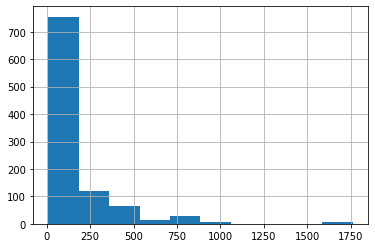

In [34]:
# Plot wid histogram
df['wid'].hist()

# Notice the data is heavily skewed

In [35]:
# Transform data and get the maxlog value used in calculations
df['widBC'], maxlog = stats.boxcox(df['wid'])

In [37]:
# Print maxlog value
maxlog

-0.21905162209450185

In [38]:
# Create our own boxcox transformation based on maxlog value
def box_cox_transform(series):
    lmbda = maxlog
    val = (series**lmbda -1)/lmbda
    return val

In [39]:
# Apply transformation
df['widBCCustom'] = df['wid'].apply(box_cox_transform)

In [41]:
# Check data
df['widBCCustom']

0      3.041863
1      2.993357
2      1.808355
3      2.110868
4      3.256446
         ...   
987    1.808355
988    1.808355
989    1.808355
990    3.361759
991    1.808355
Name: widBCCustom, Length: 992, dtype: float64

array([[<AxesSubplot:title={'center':'wid'}>,
        <AxesSubplot:title={'center':'widBC'}>],
       [<AxesSubplot:title={'center':'widBCCustom'}>, <AxesSubplot:>]],
      dtype=object)

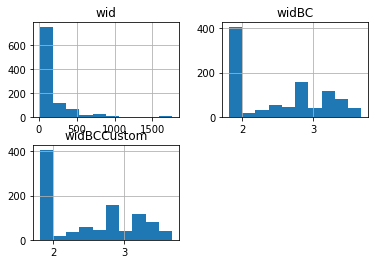

In [44]:
# Plot original data and both transformations
df[['wid', 'widBC','widBCCustom']].hist()

### Notice the two transformations are identical